**Homework 1**

My code for the solution to this homework is attached below. 

Sections of Markdown cells are used to describe the reasoning for the process as well as the results. 

The first few Code cells simply define the problem statement. The next section of cells define the initial guesses and give reasoning for the chosen solver based on the form of the cost function and constraints. The last section of cells describe and summarize the final results based on the initial guesses. 

In [31]:
## imports
import scipy as sp
import scipy.optimize as spo
import numpy as np
import matplotlib.pyplot as plt


In [32]:
## general function defs
def costFunction(x):
    cost = (x[0] - x[1])**2 + (x[1] + x[2] - 2)**2 + (x[3] - 1)**2 + (x[4] - 1)**2
    return cost

In [33]:
## constraint defs
bounds = spo.Bounds([-10, -10, -10, -10, -10], [10, 10, 10, 10, 10])
bounds_global = [(-10, 10), ]*5

# matrix form of the equality constraints needed for Trust-Region Constrainted Algorithm 
lower_constraint = [0, 0, 0]
upper_constraint = [0, 0, 0]
constraint_matrix = [[1, 3, 0, 0, 0], [0, 0, 1, 1, -2], [0, 1, 0, 0, -1]]
linear_constraint = spo.LinearConstraint(constraint_matrix, lower_constraint, upper_constraint)

In [34]:
## test a few starting conditions
x0_random_num = 20

x0_list = []
x0_list.append(np.array([0, 0, 0, 0, 0])) # it feels odd not to include this as an initial guess

# randomly pick a few conditions in the bounds
for i in range(x0_random_num):
    rand_vec = np.random.rand(len(bounds_global)) # gives uniform distribution between [0, 1) --> need to scale it and shift it to cover bounds
    bounds_scale = bounds_global[0][1] - bounds_global[0][0]
    rand_vec_scaled = rand_vec * bounds_scale # should be between 0 and 20
    rand_vec_shifted = rand_vec_scaled - (bounds_scale/2) # should be between -10 and 10
    x0_list.append(rand_vec_shifted)

# list of initial conditions.
print(x0_list)


[array([0, 0, 0, 0, 0]), array([-0.33643403, -3.34711837,  2.88046824,  8.66152389,  0.93486048]), array([-5.11761104, -7.7934477 , -6.60820311, -3.60748321,  3.71292592]), array([ 4.23180002, -9.88312208, -0.6880087 , -2.48842737, -9.21945384]), array([-7.52105853,  3.6143633 ,  1.6208023 , -4.70645486,  3.47368964]), array([ 4.32485949, -6.43817232, -1.82253849, -9.01620798,  5.18866753]), array([ 6.51716469, -0.82496151,  8.74799391,  3.94674584,  7.64085848]), array([-5.81312982,  3.65889406,  9.3987364 , -9.01044615, -8.76586839]), array([ 3.34050904, -8.11872213, -8.79934682,  2.94484035,  4.00463024]), array([-8.10146904, -8.86698551, -7.58404898, -6.33900869, -4.77033997]), array([ 3.74063554, -9.66993678, -9.49085059,  3.30156783, -9.86846536]), array([-4.73916218,  7.1918773 ,  2.81670745,  9.00818999, -8.88917647]), array([ 7.95230381,  6.51733226, -1.1549829 ,  9.50006739,  9.24323925]), array([-2.26054032,  0.58425775, -7.65524279, -7.57239548,  7.65148181]), array([-1.455

The list of initial conditions is printed above as x0_list. All initial conditions are within the bounds of $[-10, 10)$ for each vairable.

All except one initial guess were chosen at random from a uniform distribution and then scaled and shifted to the proper ranges. Note that even if the solver returns the same solution for every initial condition, it does not **prove** that there are no local minima the solver can get stuck in for the given cost function. Guarantees of a true global optimal solution (within accepted error bounds) are dependent on the form of the cost function as well as the details of the algorithm the solver uses. However, if all initial conditions return the same solution (for a sufficiently large batch of initial conditions) it is typically safe to take that solution as good approximation of the global solution assuming there is a unique global optimal solution. If there are multiple solutions, it would be good to check to see if they have the same cost which would imply there are multiple global solutions rather than multiple local solutions with some being more optimal than others. 

For the solver, the Trust-Region Constrained Algorithm was chosen as it is designed for constrained non-linear minimization problems which is suitable for the given cost function as every term (when expanded) is quadratic, linear, or a constant and the constraints are linear.

In [35]:
## opt with Trust-Region Constrainted Algorithm
res = []
res_sol = []
for i in range(len(x0_list)):
    res.append(spo.minimize(costFunction, x0_list[i], method='trust-constr', constraints=[linear_constraint], bounds=bounds, options={'verbose' : 0}))
    res_sol.append(res[i].x)

/home/nchr/anaconda3/lib/python3.8/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


[[-0.76744186  0.25581395  0.62790698 -0.11627907  0.25581395]
 [-0.76744185  0.25581395  0.62790697 -0.11627906  0.25581395]
 [-0.76744186  0.25581395  0.62790697 -0.11627906  0.25581395]
 [-0.76744185  0.25581395  0.62790696 -0.11627906  0.25581395]
 [-0.76744185  0.25581395  0.62790696 -0.11627906  0.25581395]
 [-0.76744186  0.25581395  0.62790697 -0.11627906  0.25581395]
 [-0.76744187  0.25581396  0.62790695 -0.11627904  0.25581396]
 [-0.76744185  0.25581395  0.62790696 -0.11627906  0.25581395]
 [-0.76744185  0.25581395  0.62790696 -0.11627906  0.25581395]
 [-0.76744185  0.25581395  0.62790696 -0.11627906  0.25581395]
 [-0.76744186  0.25581395  0.62790698 -0.11627907  0.25581395]
 [-0.76744185  0.25581395  0.62790698 -0.11627908  0.25581395]
 [-0.76744186  0.25581395  0.62790699 -0.11627908  0.25581395]
 [-0.76744186  0.25581395  0.62790697 -0.11627906  0.25581395]
 [-0.76744186  0.25581395  0.62790697 -0.11627907  0.25581395]
 [-0.76744186  0.25581395  0.62790697 -0.11627906  0.25

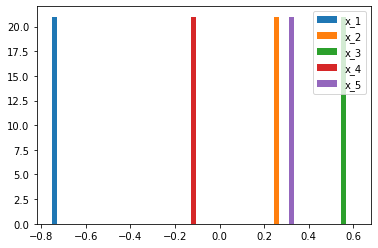

In [36]:
## check for variations solutions by forming array of solutions and ploting them
res_array = np.array(res_sol)
print(res_array)
labels = ['x_1', 'x_2', 'x_3', 'x_4', 'x_5']
plt.hist(res_array, label = labels)
plt.legend()

It appears that the solution of $f(x^*) = f(x)|_{min}$ where $ x^* =  (x_1, x_2, x_3, x_4, x_5) = (-0.76744186,  0.25581395,  0.62790698, -0.11627907,  0.25581395)$ is returned by all initial guesses within accepted tolerances. The solution is the same for all 21 initial conditions that were tested, so it does not appear that the solution is dependent on the initial guess for this problem. This conclusion can be better supported by selecting a large number of initial conditions, but 21 seems sufficently detailed for the small range of bounds for the problem and the lack of complicated or very high order terms in the cost function.